In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import warnings

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore")






In [40]:
# Nap load dataset lan
data = pd.read_csv("data/loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Dimansyon dataset lan
data.shape

(614, 13)

In [4]:
# Nap eksplore dataset lan
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Nap eksplore kolon dataset lan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Nap gade sin gen liy ki repete
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [41]:
# Nap elimine vale mankan yo koz sa ka bay algoritm M.L yo pwoblem.
data = data.dropna()

In [8]:
# Nap regade dataset lan.
data.isnull().sum()/len(data)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [9]:
# Nap gade sin gen data ki repete.
print(data.duplicated().sum())

0


In [42]:
data.shape

(480, 13)

In [43]:
X = data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = data['Loan_Status']
Y.head()

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object

In [52]:
train, X_test = train_test_split(X,random_state=42)

In [45]:
train_categorical = train.select_dtypes(exclude=['int64','Float64'])
train_categorical.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
21,Male,Yes,1,Graduate,No,Urban
84,Male,Yes,1,Graduate,No,Urban
509,Female,No,1,Graduate,No,Urban
110,Male,No,0,Graduate,No,Urban
41,Male,No,0,Graduate,No,Urban


In [46]:
train_categorical = pd.get_dummies(train_categorical,drop_first=True,dtype=float)
train_categorical.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
21,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
84,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
509,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
train_categorical.shape

(360, 9)

In [48]:
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
train_numerical = train[numerical_features]
train_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
21,5955,5625.0,315.0,360.0,1.0
84,3988,0.0,50.0,240.0,1.0
509,13262,0.0,40.0,360.0,1.0
110,5316,0.0,136.0,360.0,1.0
41,1800,1213.0,47.0,360.0,1.0


In [28]:
scaler = MinMaxScaler()
scaler.fit(train_numerical)
train_scaled = pd.DataFrame(
    scaler.transform(train_numerical),
    index=train_numerical.index,
    columns=train_numerical.columns
)

train_scaled.head()



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
21,0.071800,0.166238,0.517766,0.729730,1.0
84,0.047471,0.000000,0.069374,0.459459,1.0
509,0.162177,0.000000,0.052453,0.729730,1.0
110,0.063896,0.000000,0.214890,0.729730,1.0
41,0.020408,0.035848,0.064298,0.729730,1.0


In [ ]:
#X_train_categorical = train_categorical.drop('Loan_Status_Y', axis = 1)
#Y = train_categorical['Loan_Status_Y']

In [49]:
Y_train, Y_test = train_test_split(Y,random_state=42)
Y_train.shape

(360,)

In [50]:
X_train_full = pd.concat([train_scaled,train_categorical],axis=1)
X_train_full.head()
X_train_full.shape

(360, 14)

In [ ]:
#X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
92,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
529,Male,No,0,Not Graduate,No,6783,0.0,130.0,360.0,1.0,Semiurban,Y
505,Male,Yes,2,Graduate,No,3510,4416.0,243.0,360.0,1.0,Rural,Y
358,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0.0,Urban,N
512,Male,Yes,2,Graduate,No,3283,2035.0,148.0,360.0,1.0,Urban,Y


In [53]:
#X_test = test.drop(['Loan_Status'], axis=1)

test_categorical = X_test.select_dtypes(exclude=['int64','Float64'])
test_categorical.head()

test_categorical = pd.get_dummies(test_categorical,drop_first=True,dtype=float)
test_categorical.shape


test_numerical = X_test[numerical_features]


test_scaled = pd.DataFrame(
    scaler.transform(test_numerical),
    index=test_numerical.index,
    columns=test_numerical.columns
)

X_test_full = pd.concat([test_scaled,test_categorical],axis=1)
X_test_full.head()
X_test_full.shape



(120, 14)

Training Accuracy     : 81.39 %
Model Accuracy score     : 79.17 %
----------------------------------------------------------


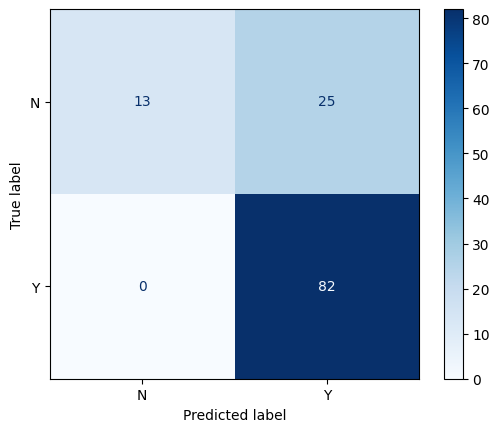

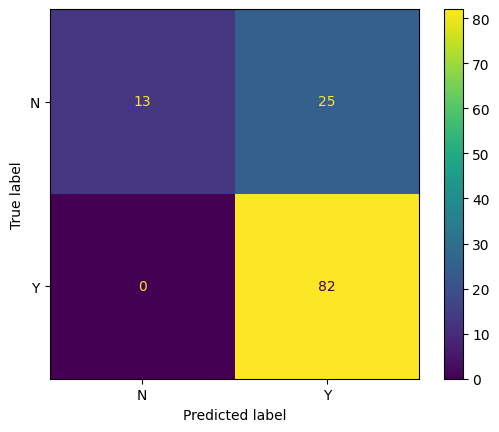

In [ ]:

logreg = LogisticRegression()
logreg.fit(X_train_full,Y_train)
Y_pred_lr = logreg.predict(X_test_full)

log_train = round(logreg.score(X_train_full,Y_train)*100,2)
log_accuracy = round(accuracy_score(Y_pred_lr,Y_test)*100,2)


print("Training Accuracy     :",log_train ,"%")
print("Model Accuracy score     :",log_accuracy ,"%")

print("\033[1m----------------------------------------------------------\033[0m")
#confusion_matrix(logreg,X_test_full,Y_test);
#plt.title('confusion_matrix');

y_pred = logreg.predict(X_test_full)
disp = ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap="Blues")
disp.plot()
plt.show()


In [ ]:
C_vals = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16.5,17]
penalties = ['12']

param = {'penalty': penalties, 'C' : C_vals}






